In [1]:
from qiskit import IBMQ

In [4]:
IBMQ.save_account('a8fcfdd741360c52c09b4642c44faf70e583ce6488385dc3832c96efba37b25e7130af197450bc4700d4e45cedd42717310a5e1567a90bc307f6e04eaecabc68')

configrc.store_credentials:WARNING:2022-06-27 19:34:43,822: Credentials already present. Set overwrite=True to overwrite.


In [5]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [2]:
from qiskit import *

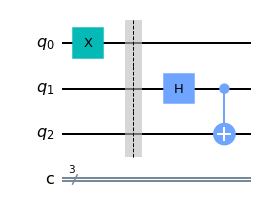

In [3]:
circuit = QuantumCircuit(3, 3)
circuit.x(0)
circuit.barrier()
circuit.h(1)
circuit.cx(1, 2)
%matplotlib inline
circuit.draw(output='mpl')

In [12]:
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram

In [1]:
from qiskit import IBMQ
IBMQ.load_account()
print([backend.name() for backend in IBMQ.providers()[0].backends()])

['ibmq_qasm_simulator', 'ibmq_armonk', 'ibmq_lima', 'ibmq_belem', 'ibmq_quito', 'simulator_statevector', 'simulator_mps', 'simulator_extended_stabilizer', 'simulator_stabilizer', 'ibmq_manila', 'ibm_nairobi', 'ibm_oslo']


In [3]:
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_qasm_simulator')

In [4]:
qasm_str = """OPENQASM 2.0;
include "qelib1.inc";

qreg q[4];
creg c[4];
ccx q[0], q[1], q[3];
cx q[0], q[1];
ch q[1], q[3];
cz q[2], q[3];
ch q[1], q[3];
cx q[1], q[2];
measure q[2] -> c[0];
measure q[3] -> c[1];
""" 

In [41]:
circuit = QuantumCircuit(4,4)

circuit.ccx(0,1,3)
circuit.cx(0,1)
circuit.ch(1,3)
circuit.cz(2,3)
circuit.ch(1,3)
circuit.cx(1,2)
circuit.measure([3, 2], [1,0])

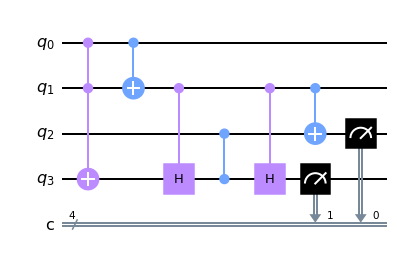

In [42]:
%matplotlib inline
circuit.draw(output='mpl')

In [38]:
print("Circuit depth: ", circuit.depth())

Circuit depth:  8


In [39]:

job = execute(circuit, backend)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)
circuit.draw()


Total count for 00 and 11 are: {'0011': 4000}


┌───┐ ░                                
q_0: ┤ X ├─░───■────■───────────────────────
     ├───┤ ░   │  ┌─┴─┐                     
q_1: ┤ X ├─░───■──┤ X ├──■───────■────■─────
     ├───┤ ░   │  └───┘  │       │  ┌─┴─┐┌─┐
q_2: ┤ X ├─░───┼─────────┼───■───┼──┤ X ├┤M├
     └───┘ ░ ┌─┴─┐     ┌─┴─┐ │ ┌─┴─┐└┬─┬┘└╥┘
q_3: ──────░─┤ X ├─────┤ H ├─■─┤ H ├─┤M├──╫─
           ░ └───┘     └───┘   └───┘ └╥┘  ║ 
c: 4/═════════════════════════════════╩═══╩═
                                      1   0

In [46]:
circuit.count_ops()

OrderedDict([('cx', 2), ('ch', 2), ('measure', 2), ('ccx', 1), ('cz', 1)])

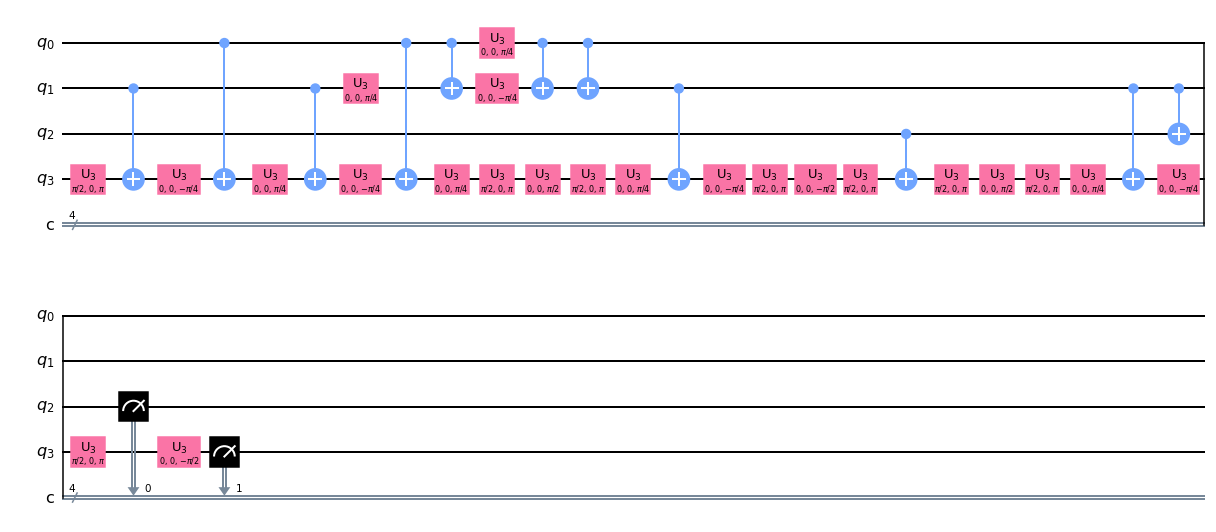

In [43]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(circuit) 
new_circuit.draw(output='mpl')

In [45]:
new_circuit.count_ops()

OrderedDict([('u3', 23), ('cx', 11), ('measure', 2)])

In [48]:
qasm_str1 = """OPENQASM 2.0;
include "qelib1.inc";

qreg q[4];
creg c[4];
ccx q[0], q[1], q[3];
cx q[0], q[1];
ccx q[1], q[2], q[3];
cx q[1], q[2];
measure q[2] -> c[0];
measure q[3] -> c[1];
"""

In [49]:
circuit1 = QuantumCircuit.from_qasm_str(qasm_str1)

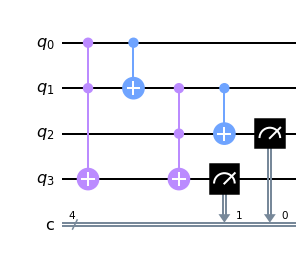

In [50]:
%matplotlib inline
circuit1.draw(output='mpl')

In [51]:
print("Circuit depth: ", circuit1.depth())

Circuit depth:  5


In [25]:
simulator = QasmSimulator()
job = simulator.run(circuit1, shots=1000)
result = job.result()
counts = result.get_counts(circuit1)
print("\nTotal count for 00 and 11 are:",counts)
circuit1.draw()


Total count for 00 and 11 are: {'0000': 1000}


q_0: ──■────■───────────────
       │  ┌─┴─┐             
q_1: ──■──┤ X ├──■────■─────
       │  └───┘  │  ┌─┴─┐┌─┐
q_2: ──┼─────────■──┤ X ├┤M├
     ┌─┴─┐     ┌─┴─┐└┬─┬┘└╥┘
q_3: ┤ X ├─────┤ X ├─┤M├──╫─
     └───┘     └───┘ └╥┘  ║ 
c: 4/═════════════════╩═══╩═
                      1   0

In [52]:
circuit1.count_ops()

OrderedDict([('ccx', 2), ('cx', 2), ('measure', 2)])

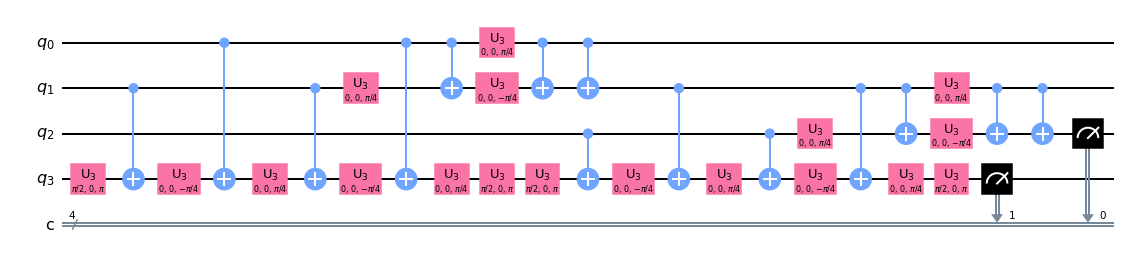

In [53]:
new_circuit1 = pm.run(circuit1) 
new_circuit1.draw(output='mpl')

In [54]:
new_circuit1.count_ops()

OrderedDict([('u3', 18), ('cx', 14), ('measure', 2)])

In [35]:
circuit2 = QuantumCircuit(3,1)
circuit2.swap(0,1)


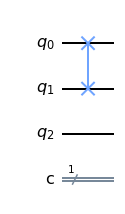

In [36]:
%matplotlib inline
circuit2.draw(output='mpl')

In [37]:
print("Circuit depth: ", circuit2.depth())

Circuit depth:  1


In [45]:
qasm2_str = """OPENQASM 2.0;
include "qelib1.inc";

qreg q[4];
creg c[4];
s q[0];
s q[1];
h q[0];
cx q[0], q[1];
cx q[1], q[0];
h q[1];
"""

In [46]:
circuit3 = QuantumCircuit.from_qasm_str(qasm2_str)

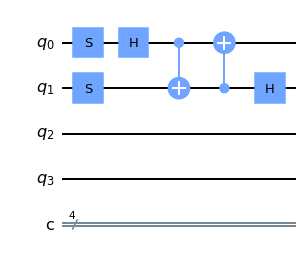

In [47]:
%matplotlib inline
circuit3.draw(output='mpl')

In [48]:
print("Circuit depth: ", circuit3.depth())

Circuit depth:  5
